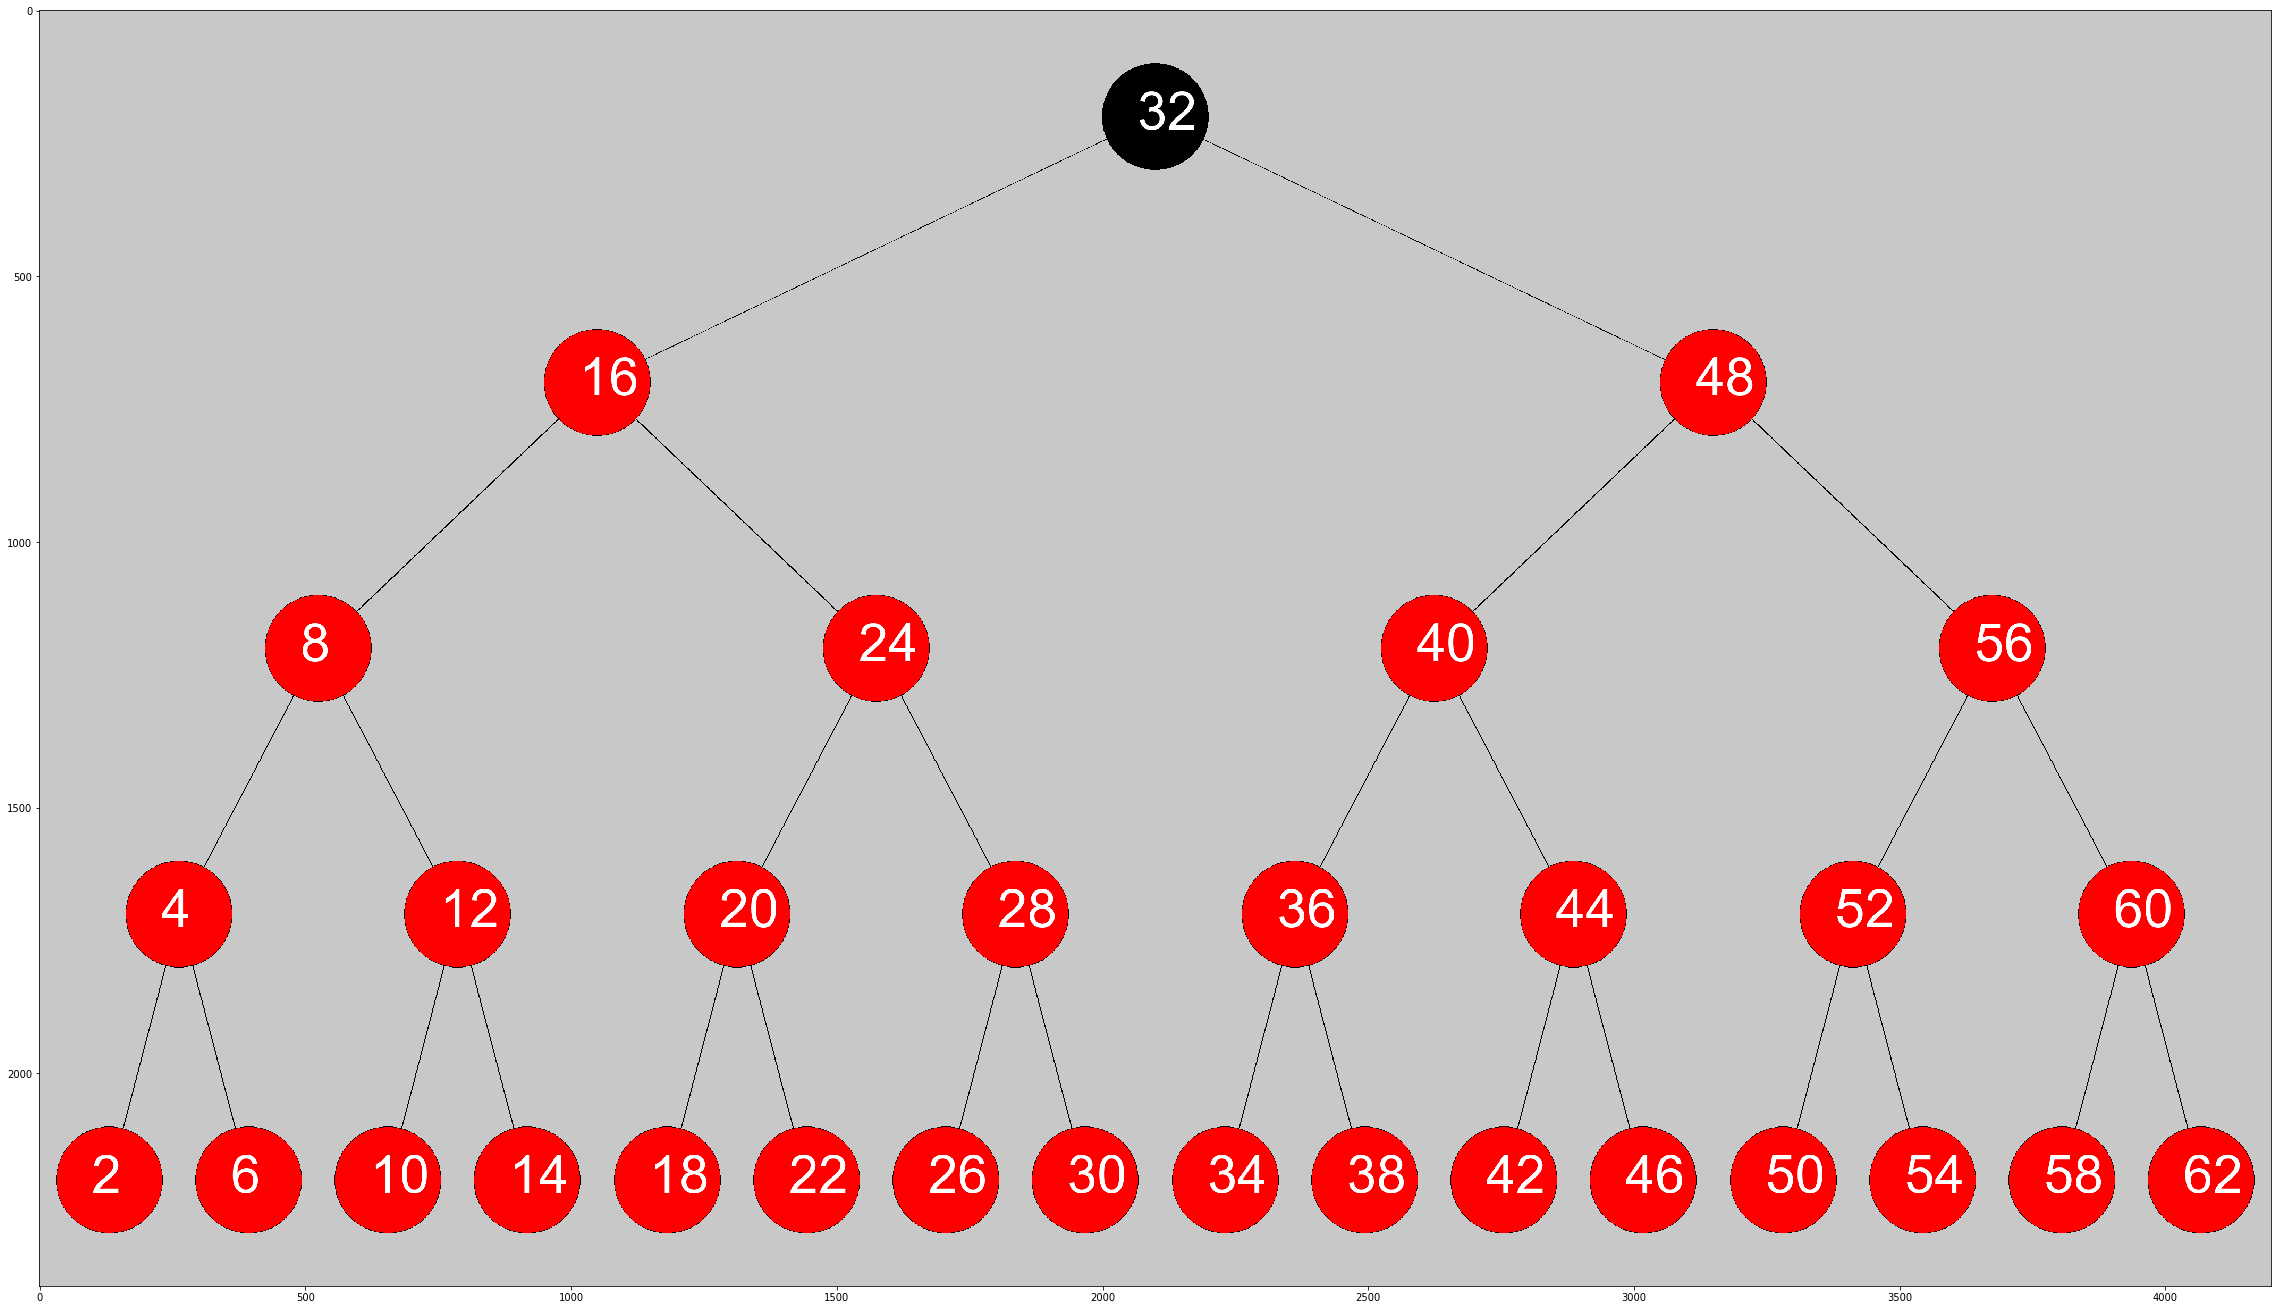

 EXIT


In [5]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

Colour = Enum('Colour', 'BLACK RED')


class Node:
    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.data = data
        self.colour = Colour.BLACK

    def Insert(self, data):
        if self.data:
            if data <= self.data:
                if self.left is None:
                    self.left = Node(data)
                    self.left.parent = self
                else:
                    self.left.Insert(data)
            else:
                if self.right is None:
                    self.right = Node(data)
                    self.right.parent = self
                else:
                    self.right.Insert(data)
        else:
            self.data = data
            
    def InsertList(self,lst):
        for i in lst:
            self.Insert(i)
            
            
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data),
        if self.right:
            self.right.PrintTree()
    
    def PreOrderTree(self):
        print(self.data)
        if self.left:
            self.left.PreOrderTree()
        if self.right:
            self.right.PreOrderTree()
            
    def PostOrderTree(self):
        if self.left:
            self.left.PostOrderTree()
        if self.right:
            self.right.PostOrderTree()
        print (self.data)
    
    def Height(self):
        try:
            lh = self.left.Height()
        except:
            lh = -1
        try:
            rh = self.right.Height()
        except:
            rh = -1
        if lh > rh: return lh + 1
        else: return rh + 1
    def PrintGivenLevel(self,level):
        if level == 0:
            print(self.data,end = " ")
        else:
            if self.left is None:
                k = 2 ** (level-1)
                while k > 0:
                    print("n",end=" ")
                    k -= 1
            else:
                self.left.PrintGivenLevel(level-1)
            if self.right is None:
                level -= 1
                k = 2 ** level
                while k > 0:
                    print("n",end=" ")
                    k -= 1
            else:
                self.right.PrintGivenLevel(level-1)
    def LevelOrderTree(self):
        for i in range(self.Height() + 1):
            self.PrintGivenLevel(i)
            print()
    
    def DrawBranches(self,r,sizeX,sizeY,img,d,f,currentLevel,currentX,currentY):
        if self.left:
            currentX1 = currentX - sizeX//(2**currentLevel)
            currentY1 = currentY + 5 * r
            rvX1 = int(r*(currentX1-currentX)/((currentX1-currentX)**2+(currentY1-currentY)**2)**(1/2))
            rvY1 = int(r*(currentY1-currentY)/((currentX1-currentX)**2+(currentY1-currentY)**2)**(1/2))
            d.line([(currentX + rvX1, currentY + rvY1) , (currentX1,currentY1)], width = 2, fill=(0,0,0))
            if self.left.colour == Colour.BLACK:
                d.ellipse([(currentX1 - r, currentY1 - r),(currentX1 + r,currentY1 + r)], outline = (0,0,0),fill = (0,0,0), width = 1)
            else:
                d.ellipse([(currentX1 - r, currentY1 - r),(currentX1 + r,currentY1 + r)], outline = (0,0,0),fill = (255,0,0), width = 1)
            d.text((currentX1-r//3,currentY1-2*r//3),str(self.left.data), fill=(255,255,255), font = f)
            self.left.DrawBranches(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX1,currentY1)
        if self.right:
            currentX2 = currentX + sizeX//(2**currentLevel)
            currentY2 = currentY + 5 * r
            rvX2 = int(r*(currentX2-currentX)/((currentX2-currentX)**2+(currentY2-currentY)**2)**(1/2))
            rvY2 = int(r*(currentY2-currentY)/((currentX2-currentX)**2+(currentY2-currentY)**2)**(1/2))
            d.line([(currentX + rvX2, currentY + rvY2) , (currentX2,currentY2)], width = 2, fill=(0,0,0))
            if self.right.colour == Colour.BLACK:
                d.ellipse([(currentX2 - r, currentY2 - r),(currentX2 + r,currentY2 + r)], outline = (0,0,0),fill = (0,0,0), width = 1)
            else:
                d.ellipse([(currentX2 - r, currentY2 - r),(currentX2 + r,currentY2 + r)], outline = (0,0,0),fill = (255,0,0), width = 1)
            d.text((currentX2-r//3,currentY2-2*r//3),str(self.right.data), fill=(255,255,255), font = f)
            self.right.DrawBranches(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX2,currentY2)
            
            
            
    def DrawTree(self,name):
        currentLevel = 1
        r = 100
        sizeX = 4200
        sizeY = 2400
        img = Image.new('RGB', (sizeX, sizeY), color = (200,200,200))
        d = ImageDraw.Draw(img)
        f = ImageFont.truetype("arial.ttf", r)
        
        currentX, currentY = sizeX//2, 2*r
        
        
        d.ellipse([(currentX - r, currentY - r),(currentX + r,currentY + r)], outline = (0,0,0),fill = (0,0,0), width = 1)
        d.text((currentX-r//3,currentY-2*r//3),str(self.data), fill=(255,255,255), font = f)
        
        self.DrawBranches(r,sizeX,sizeY,img,d,f,currentLevel + 1,currentX,currentY)
        
        img.save(name)
        
        
    def TreeMin(self):
        if self.left:
            return self.left.TreeMin()
        else:
            return self
    
    def TreeMax(self):
        if self.right:
            return self.right.TreeMax()
        else:
            return self
        
    def TreeSearch(self,n):
        if n == self.data:
            return self
        elif n < self.data:
            if self.left:
                return self.left.TreeSearch(n)
            else:
                return None
        elif n > self.data:
            if self.right:
                return self.right.TreeSearch(n)
            else:
                return None
    
    def FirstLeft(self):
        if self == self.parent.left:
            return self.parent
        else:
            return self.parent.FirstLeft()
    
    def FirstRight(self):
        if self == self.parent.right:
            return self.parent
        else:
            return self.parent.FirstRight()
    
    def NodeSuccessor(self):
        if self.right:
            return self.right.TreeMin()
        else:
            return self.FirstLeft()
        
    def NodePredecessor(self):
        if self.left:
            return self.left.TreeMax()
        else:
            return self.FirstRight()
        
    def Delete(self):
        if not(self.left or self.right):
            if self.parent:
                if self == self.parent.right:
                    self.parent.right = None
                if self == self.parent.left:
                    self.parent.left = None
                del self
            else:
                self.data = None
        elif (not self.left) and (self.right):
            if self.parent:
                if self == self.parent.right:
                    self.parent.right = self.right
                if self == self.parent.left:
                    self.parent.left = self.right
                self.right.parent = self.parent 
            else:
                self.right.parent = None
            del self
        elif (self.left) and (not self.right):
            if self.parent:
                if self == self.parent.right:
                    self.parent.right = self.left
                if self == self.parent.left:
                    self.parent.left = self.left
                self.left.parent = self.parent
            del self
        else:
            if self.right == self.right.TreeMin():
                if self.parent:
                    self.right.left = self.left
                    if self == self.parent.right:
                        self.parent.right = self.right
                    if self == self.parent.left:
                        self.parent.left = self.right
                    self.right.parent = self.parent
                    self.left.parent = self.right
                    del self
                else:
                    self.data = self.right.data
                    c = self.right
                    self.right = c.right
                    del c
                    
            else:
                y = self.right.TreeMin()
                y.parent.left = y.right
                
                if self.parent:
                    y.left = self.left
                    y.right = self.right
                    if self == self.parent.right:
                        self.parent.right = y
                    if self == self.parent.left:
                        self.parent.left = y
                    y.parent = self.parent
                    del self
                else:
                    self.data = y.data
                    del y
        
            
            

lst = []


root = Node(None)

root.InsertList([32,16,48,8,24,40,56,4,12,20,28,36,44,52,60,2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62])
#root.InsertList([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63])


root.DrawTree("pil.png")


pil_im = Image.open('pil.png', 'r')
fig = plt.figure()
fig.set_size_inches(40,100)
ar = np.asarray(pil_im)
plt.imshow(ar)
plt.show()
pil_im.close()
inp = ""
while 1==1:
    inp = input()
    if inp == "EXIT":
        break
    lst = inp.split(" ")
    com = lst.pop(0)
    
    if com == "delete":
        for a in lst:
            root.TreeSearch(int(a)).Delete()
    elif com == "insert":
        for a in lst:
            root.Insert(int(a))
    root.DrawTree("pil.png")
    pil_im = Image.open('pil.png', 'r')
    fig = plt.figure()
    fig.set_size_inches(40,100)
    ar = np.asarray(pil_im)
    plt.imshow(ar)
    plt.show()
    pil_im.close()
    
    